# Practical Python for Astronomers

My notes on the [Practical Python for Astronomers](http://python4astronomers.github.io/) tutorial.

* [Introduction and Motivation](#Introduction-and-Motivation)
* [Core packages for analysis: IPython, NumPy, SciPy](#Core-packages-for-analysis:-IPython,-NumPy,-SciPy)
* [Advanced Plotting](#Advanced-Plotting)
* [Reading and Writing Files](#Reading-and-Writing-files)
* [Astropy Core Functions](#Astropy-Core-Functions)
* [WCS Transformations](#WCS-Transformations)
* [Fitting and Modelling 1D and 2D data](#Fitting-and-Modelling-1D-and-2D-data)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path =  os.path.join(os.getcwd(), 'install_examples/py4ast/install')

In [3]:
plt.style.use('astroph')

In [4]:
#plt.rc('text', usetex=True)

## Introduction and Motivation

[**&uarr; Return to Contents**](#Practical-Python-for-Astronomers)

### Reading a table and plotting

In [5]:
from astropy.io import ascii

In [6]:
data_url = 'https://raw.githubusercontent.com/python4astronomers/python4astronomers/stable/examples/tables/fermi_agn.dat'

In [7]:
dat = ascii.read(data_url)

In [8]:
dat.info

<Table length=869>
         name           dtype 
---------------------- -------
                  name   str17
              agn_name   str30
                    ra float64
                   dec float64
                   lii float64
                   bii float64
    angular_separation float64
          error_radius float64
     assoc_probability float64
         optical_class    str7
             sed_class    str4
              redshift float64
     photon_flux_limit    str4
           photon_flux float64
     photon_flux_error float64
        spectral_index float64
  spectral_index_error float64
detection_significance float64
      variability_flag    str1
        curvature_flag    str1
             note_flag    str4
            clean_flag    str1
             type_flag    str1
                  null   int64

In [9]:
redshift = dat['redshift']
flux = dat['photon_flux']
gamma = dat['spectral_index']

Select rows with measured redshifts (-999 is a ```NaN``` representation)

In [10]:
with_z = (redshift!=-999)

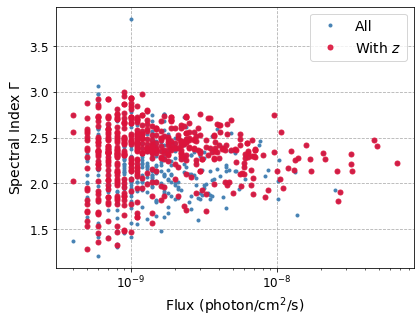

In [11]:
plt.figure()
plt.semilogx(flux, gamma, '.', color='steelblue', label='All')
plt.semilogx(flux[with_z], gamma[with_z], 'o', color='crimson', markersize=5,
            label='With $z$', alpha=0.9)
plt.legend(markerscale=1)
plt.grid(linestyle='dashed')
plt.xlabel("Flux (photon/cm$^2$/s)")
plt.ylabel("Spectral Index $\Gamma$")
plt.show()

In [12]:
low_z = with_z & (redshift < 0.8)
high_z = with_z & (redshift >= 0.8)

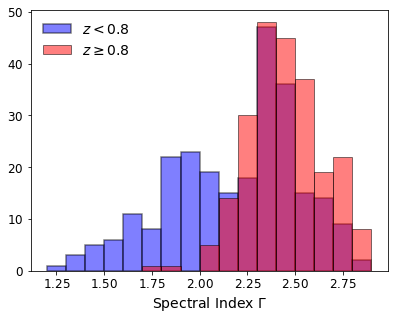

In [13]:
plt.figure()
bins = np.arange(1.2, 3.0, 0.1)
plt.hist(gamma[low_z], bins, histtype='bar', rwidth=1, color='blue', alpha=0.5,
         label='$z < 0.8$',edgecolor='black', linewidth=1.5)
plt.hist(gamma[high_z], bins, color='red', alpha=0.5, label='$z \geq 0.8$', edgecolor='black')
plt.xlabel("Spectral Index $\Gamma$")
plt.legend(frameon=False)
plt.show()

#### Extra

In [14]:
dat_df = dat.to_pandas()

In [15]:
dat_df.describe()

,ra,dec,lii,bii,angular_separation,error_radius,assoc_probability,redshift,photon_flux,photon_flux_error,spectral_index,spectral_index_error,detection_significance,null
count,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,8.690000e+02,8.690000e+02,869.000000,869.000000,869.000000,869.0
mean,175.632072,5.912054,173.074920,3.423198,0.074322,0.117512,0.839436,-431.756028,2.405754e-09,-8.507020e+01,2.256076,0.145029,12.903452,-999.0
std,102.996759,37.671613,97.747937,43.580829,0.074944,0.075187,0.328388,495.667679,4.557173e-09,2.789942e+02,0.325168,0.074989,15.134104,0.0
min,0.325120,-85.720860,0.595030,-87.963932,0.001000,0.009000,0.000000,-999.000000,4.000000e-10,-9.990000e+02,1.210000,0.010000,4.100000,-999.0
25%,84.976170,-21.061050,91.884875,-32.024104,0.027000,0.067000,0.930000,-999.000000,8.000000e-10,3.000000e-10,2.040000,0.090000,5.900000,-999.0
50%,177.852750,6.960720,166.245052,7.841677,0.052000,0.102000,0.990000,0.138000,1.200000e-09,3.000000e-10,2.290000,0.140000,8.200000,-999.0
75%,257.421210,35.777000,250.180040,40.948843,0.096000,0.149000,1.000000,0.874000,2.200000e-09,4.000000e-10,2.470000,0.180000,13.700000,-999.0
max,359.782500,83.270390,359.162735,86.340021,0.665000,0.483000,1.000000,3.197000,6.700000e-08,1.600000e-09,3.800000,0.620000,188.700000,-999.0


In [16]:
dat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    869 non-null    object 
 1   agn_name                869 non-null    object 
 2   ra                      869 non-null    float64
 3   dec                     869 non-null    float64
 4   lii                     869 non-null    float64
 5   bii                     869 non-null    float64
 6   angular_separation      869 non-null    float64
 7   error_radius            869 non-null    float64
 8   assoc_probability       869 non-null    float64
 9   optical_class           869 non-null    object 
 10  sed_class               869 non-null    object 
 11  redshift                869 non-null    float64
 12  photon_flux_limit       869 non-null    object 
 13  photon_flux             869 non-null    float64
 14  photon_flux_error       869 non-null    fl

### Curve fitting with SciPy

In [17]:
from scipy.optimize import curve_fit

In [18]:
def gaussian(x, a, b, c):
    val = a*np.exp(-(x-b)**2/c**2)
    return val

In [19]:
def generate_data(n, interval, function, **kwargs):
    domain = np.random.uniform(*interval, n)
    y = function(domain, **kwargs) + np.random.normal(.0, 2.0, n)
    error = np.random.uniform(0.1, 1, n)
    return domain, y, error

In [20]:
x, y, e = generate_data(50, (-10,  10), gaussian, a=15, b=0, c=2)

In [21]:
popt, pcov = curve_fit(gaussian, x, y, sigma=e, p0=[1, 3, 2])

In [22]:
xm = np.linspace(x.min(), x.max(), 10**3)

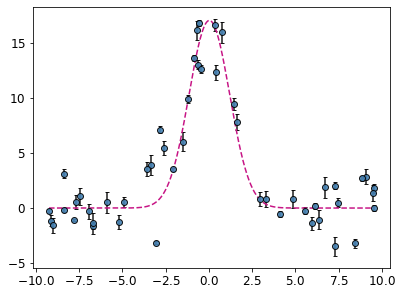

In [23]:
plt.errorbar(x, y, yerr=e, fmt='o', mfc='steelblue', markersize=6, alpha=0.9, color='k', capsize=2, ecolor='black', capthick=1)
plt.plot(xm, gaussian(xm, *popt), '--', color='mediumvioletred')
plt.show()

In [24]:
popt

array([17.03877412,  0.02978145,  1.65821303])

In [25]:
np.sqrt(np.diag(pcov))

array([1.33580721, 0.13549957, 0.15478965])

### Synthetic images

In [26]:
from astropy.io import fits
from scipy.ndimage import gaussian_filter

In [27]:
nx, ny = 512, 512
image = np.zeros((nx, ny))

In [28]:
n_stars = 10**4

In [29]:
r = np.random.random(n_stars)*nx
theta = np.random.uniform(0, 2*np.pi, n_stars)

In [30]:
flux = np.random.random(size=n_stars)*500

In [31]:
pos_x = (nx/2 + r*np.cos(theta)).astype(np.int64)
pos_y = (ny/2 + r*np.sin(theta)).astype(np.int64)

In [32]:
for i in range(n_stars):
    if 0 < pos_x[i] < nx and 0 < pos_y[i] < ny:
        image[pos_x[i], pos_y[i]] += flux[i]

In [33]:
image = gaussian_filter(image, 1.0)

In [34]:
image += np.random.normal(3.0, 1e-2, image.shape)

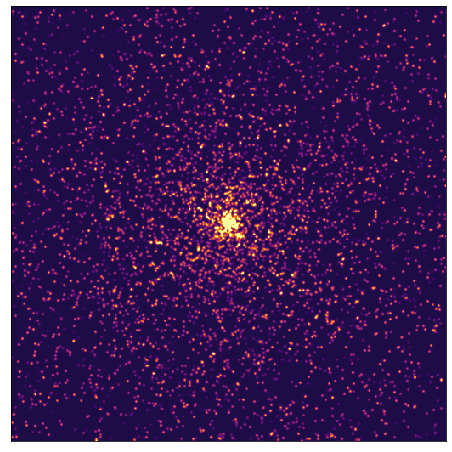

In [35]:
plt.figure(figsize=(8,8))
plt.imshow(image, plt.cm.inferno, vmin=-10, vmax=100)
plt.xticks([])
plt.yticks([])
plt.show()

##### Saving as ```FITS```

In [36]:
#fits.writeto(data=image, filename='synthetic-cluster.fits')

### Making a publication quality image 

Using the APLpy package. The tutorial mentions it can be used to make interactive plots. That's something to explore. 

In [37]:
images_folder = './install_examples/py4ast/install'

In [38]:
images = [os.path.join(images_folder, x) for x in ['m1.fits', 'i3.fits', 'i2.fits']]

Not working due to improper FITS file header.

## Core packages for analysis: IPython, NumPy, SciPy

[**&uarr; Return to Contents**](#Practical-Python-for-Astronomers)

### 2D STIS Reduction

[STIS (*Space Telescope Imaging Spectrograph*)](https://www.spacetelescope.org/about/general/instruments/stis/) is a Hubble telescope intrument.

In [39]:
from six.moves.urllib import request
import tarfile
url = 'http://python4astronomers.github.io/_downloads/core_examples.tar'
tarfile.open(fileobj=request.urlopen(url), mode='r|').extractall()

In [40]:
from astropy.io import fits

In [41]:
hdus = fits.open('py4ast/core/3c120_stis.fits.gz')

In [42]:
hdus

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f1a43b4a190>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f1a43b16e50>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f1a43b1be90>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f1a43b22050>]

In [43]:
primary = hdus[0].data  # Primary (NULL) header data unit
img = hdus[1].data      # Intensity data
err = hdus[2].data      # Error per pixel
dq = hdus[3].data       # Data quality per pixel

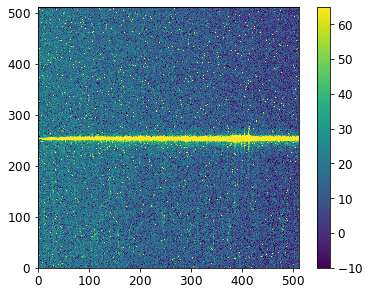

In [44]:
plt.imshow(img, origin='lower', cmap=plt.cm.viridis, vmin=-10, vmax=65)
plt.ticklabel_format(style='plain', axis='both')
plt.colorbar()
plt.show()

In [45]:
err.min(), err.max()

(5.7607665, 760.5958)

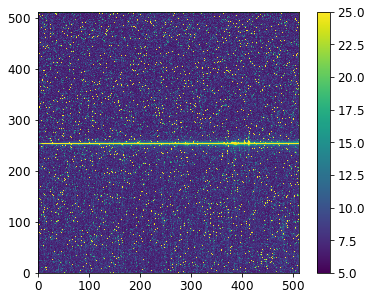

In [46]:
plt.imshow(err, origin='lower', cmap=plt.cm.viridis, vmin=5, vmax=25)
plt.ticklabel_format(style='plain', axis='both')
plt.colorbar()
plt.show()

In [47]:
dq.min(), dq.max()

(0, 9232)

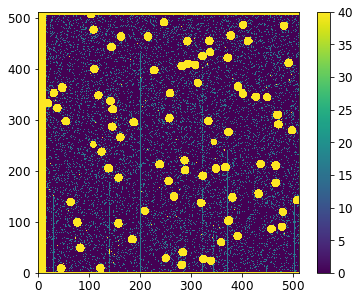

In [49]:
plt.imshow(dq, origin='lower', cmap=plt.cm.viridis, vmin=0, vmax=40)
plt.ticklabel_format(style='plain', axis='both')
plt.colorbar()
plt.show()

#### Some Numpy Basics
I'll be only digging through things I've not already encountered.

In [50]:
a = np.ones((10, 5), dtype=np.float32)

In [51]:
identity = np.zeros_like(a)

In [52]:
pairs = np.random.random((10, 2))

In [53]:
pairs.ravel() 

array([0.66121572, 0.07937048, 0.13211412, 0.83114316, 0.62308026,
       0.0429606 , 0.71470629, 0.17169851, 0.86121179, 0.9477899 ,
       0.92678554, 0.54732098, 0.81192647, 0.5546348 , 0.17179763,
       0.7408798 , 0.52137751, 0.88983026, 0.76810433, 0.90851544])

In [54]:
pairs.reshape(1,-1)

array([[0.66121572, 0.07937048, 0.13211412, 0.83114316, 0.62308026,
        0.0429606 , 0.71470629, 0.17169851, 0.86121179, 0.9477899 ,
        0.92678554, 0.54732098, 0.81192647, 0.5546348 , 0.17179763,
        0.7408798 , 0.52137751, 0.88983026, 0.76810433, 0.90851544]])

In [55]:
pairs.reshape(-1,1)

array([[0.66121572],
       [0.07937048],
       [0.13211412],
       [0.83114316],
       [0.62308026],
       [0.0429606 ],
       [0.71470629],
       [0.17169851],
       [0.86121179],
       [0.9477899 ],
       [0.92678554],
       [0.54732098],
       [0.81192647],
       [0.5546348 ],
       [0.17179763],
       [0.7408798 ],
       [0.52137751],
       [0.88983026],
       [0.76810433],
       [0.90851544]])

In [56]:
pairs.flatten()

array([0.66121572, 0.07937048, 0.13211412, 0.83114316, 0.62308026,
       0.0429606 , 0.71470629, 0.17169851, 0.86121179, 0.9477899 ,
       0.92678554, 0.54732098, 0.81192647, 0.5546348 , 0.17179763,
       0.7408798 , 0.52137751, 0.88983026, 0.76810433, 0.90851544])

In [57]:
np.all(np.equal(pairs.reshape(1, -1), pairs.ravel()))

True

In [58]:
img.shape

(512, 511)

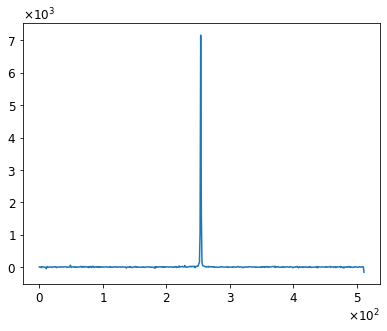

In [59]:
plt.rc('text', usetex=False)
plt.plot(img[:, 300].astype(np.float64))
plt.show()

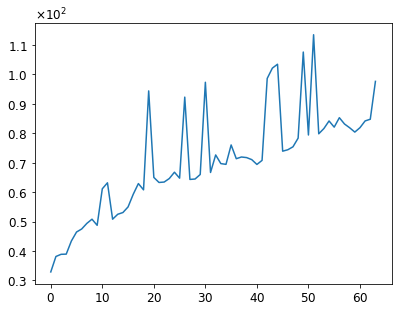

In [60]:
plt.plot(err[254, 10:200:3])
plt.show()

In [61]:
dq[251:254, 101:105].sum(axis=0)

array([  16, 3088, 3088, 3072])

#### Plot the spatial profile and raw spectrum

*Exploring the headers*

In [62]:
hdus[1].header;

In [63]:
profile = img.sum(axis=1)

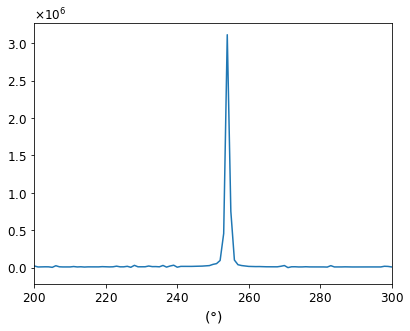

In [64]:
plt.plot(profile, '-')
plt.xlabel(r'$(\degree)$')
plt.xlim(2e2, 3e2)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

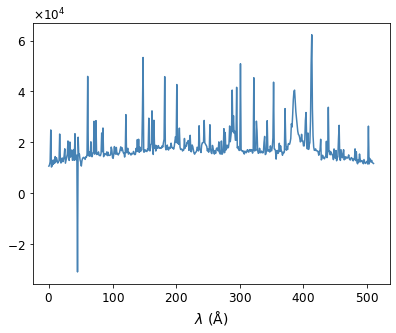

In [65]:
spectrum = img.sum(axis=0)
plt.ticklabel_format(style='plain', axis='x')
plt.plot(spectrum, color='steelblue')
plt.xlabel(r'$\lambda$ $(\mathrm{\AA})$')
plt.show()

**Exercise**

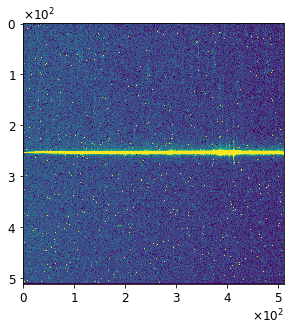

In [66]:
plt.imshow(img, vmin=-10, vmax=100)
plt.show()

In [67]:
center = np.argmax(img, axis=0).mean().astype(np.int16)

In [68]:
width = 10

In [69]:
masked_image = img[center-width:center+width+1, :]

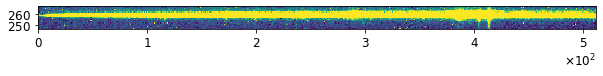

In [70]:
plt.figure(figsize=(10, 8))
plt.imshow(masked_image, vmin=0, vmax=100, extent=[0, 512, center-width, center+width+1])
plt.ticklabel_format(axis='y', style='plain')
plt.show()

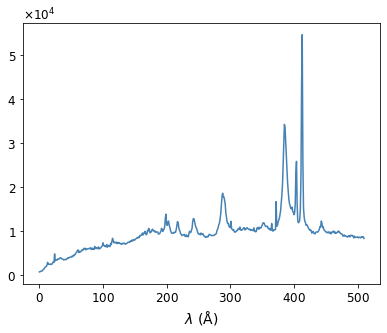

In [71]:
masked_spectrum = masked_image.sum(axis=0)
plt.ticklabel_format(style='plain', axis='x')
plt.plot(masked_spectrum, color='steelblue')
plt.xlabel(r'$\lambda$ $(\mathrm{\AA})$')
plt.show()

### Filter the cosmic ray background

Remember that each column is a cut in the spatial direction for a fixed wavelenght bin. 

| $\lambda$ | $y$|
| :---: | :---: |
| **&rarr;** | **&uarr;**|

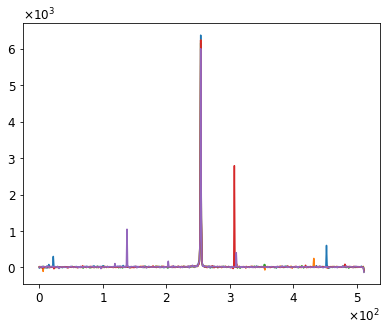

In [72]:
plt.plot(img[:, 254:259])
plt.show()

Our goal is to get rid of these spikes. They were probably caused by cosmic rays. To accomplish this, we'll be using a median filter with 5x5 kernel with sigma-clipping to remove large deviations between the original and smoothed image.

In [73]:
import scipy.signal

In [74]:
img_sm = scipy.signal.medfilt(img, 5)
sigma = np.median(err)
bad = np.abs(img - img_sm)/sigma > 8.0
img_cr = img.copy()
img_cr[bad] = img_sm[bad]
img_cr[center-width:center+width, :] = img[center-width:center+width, :]

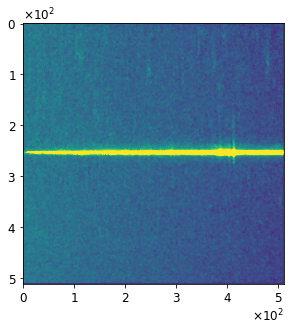

In [75]:
plt.imshow(img_sm, cmap=plt.cm.viridis, vmin=-10, vmax=65)
plt.show()

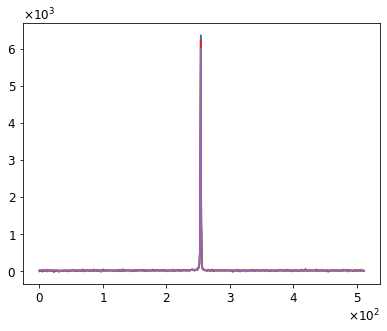

In [76]:
plt.plot(img_cr[:, 254:259])
plt.show()

**Exercício**

In [77]:
x = np.linspace(-20, 20, 10**2)
y = np.linspace(-20, 20, 10**2)
X, Y = np.meshgrid(x, y)

In [78]:
r = np.sqrt(X**2+Y**2)

In [79]:
z = np.cos(r)/(r+5)

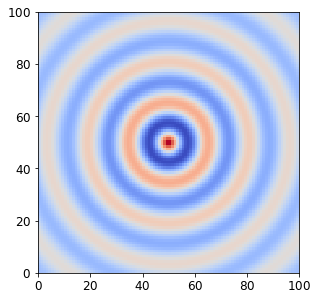

In [80]:
plt.imshow(z, cmap='coolwarm', extent=[0, 100, 0, 100])
plt.ticklabel_format(style='plain')
plt.show()

In [81]:
mask = (np.hypot(X-15, Y-10) < 10)

In [82]:
z[mask] = 0

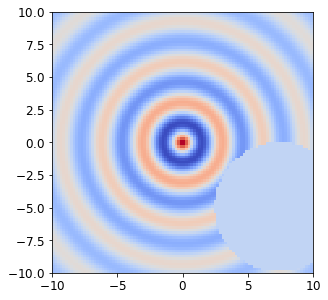

In [83]:
plt.imshow(z, cmap='coolwarm', extent=[-10, 10, -10, 10])
plt.ticklabel_format(style='plain')
plt.show()

### Fit the background

We'll fit a polynomial to the background region. In the tutorial they defined this region visually, but try a more robust determination by using masks.

In [84]:
background = np.append(np.arange(10, 200), np.arange(300, 480))

In [85]:
y = img_cr[background, 10] # the 10th column

In [86]:
model = np.polyfit(background, y, deg=2)

In [87]:
background_poly = np.poly1d(model)

In [88]:
fit = background_poly(np.arange(img_cr.shape[1]))

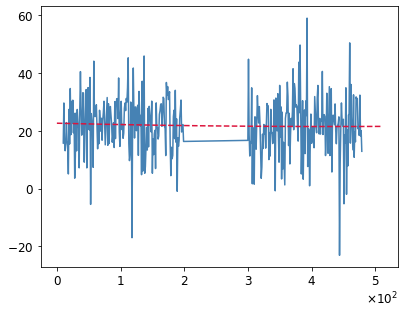

In [89]:
plt.plot(background, y, color='steelblue', zorder=1)
plt.plot(np.arange(img_cr.shape[1]), fit, '--', color='crimson')
plt.show()

*Now for all columns*

In [90]:
img_cols = np.arange(img_cr.shape[1])
xrows = np.arange(img_cr.shape[0])
bkg = np.zeros_like(img_cr)
for col in img_cols:
    bkg_poly = np.polyfit(background, img_cr[background, col], deg=2)
    bkg[:, col] = np.polyval(bkg_poly, xrows)

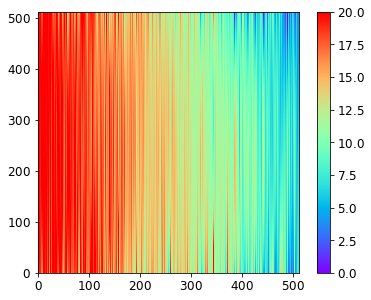

In [91]:
plt.imshow(bkg, origin='lower', cmap=plt.cm.rainbow, vmin=0, vmax=20)
plt.colorbar()
plt.ticklabel_format(style='plain')
plt.show()

In [92]:
img_bkg = img_cr-bkg

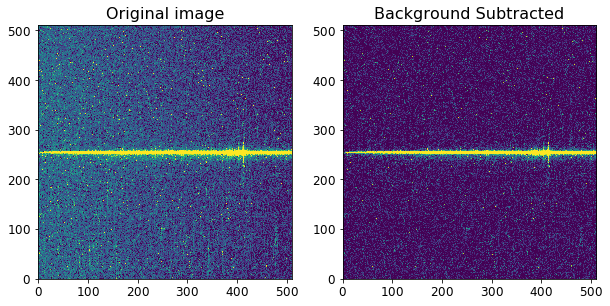

In [93]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10))
ax[0].imshow(img_cr, vmin=0, origin='lower', vmax=60, cmap=plt.cm.viridis)
ax[0].set_title('Original image')
ax[1].imshow(img_bkg, vmin=0, vmax=60, origin='lower',cmap=plt.cm.viridis)
ax[1].set_title('Background Subtracted')
ax[1].ticklabel_format(style='plain')
ax[0].ticklabel_format(style='plain')
plt.show()

**Exercício**

In [94]:
final_spectrum = img_bkg[center-width:center+width+1, :].sum(axis=0)

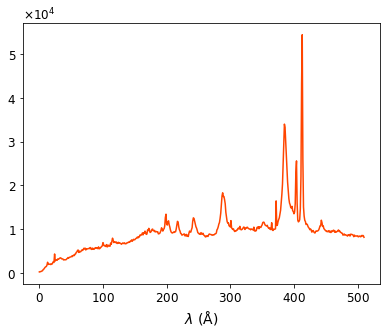

In [95]:
plt.plot(final_spectrum, color='orangered')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel(r'$\lambda$ $(\mathrm{\AA})$')
plt.show()

### Advanced Plotting

[**&uarr; Return to Contents**](#Practical-Python-for-Astronomers)

In [96]:
wav = np.arange(final_spectrum.shape[0])

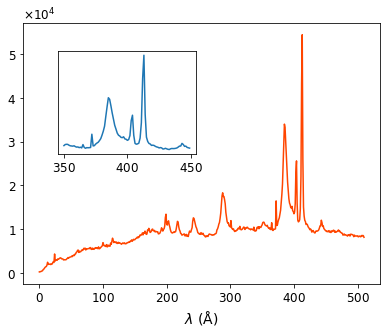

In [97]:
fig, ax = plt.subplots()
ax.plot(wav, final_spectrum, color='orangered')
ax.ticklabel_format(style='plain', axis='x')
ax.set_xlabel(r'$\lambda$ $(\mathrm{\AA})$')
ax2 = fig.add_axes([0.2, 0.5, 0.3, 0.3])
ax2.set_yticks([])
ax2.plot(wav[350:450], final_spectrum[350:450])
ax2.ticklabel_format(style='plain')
plt.show()

#### Twin axes

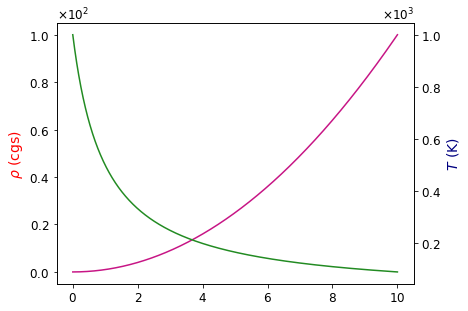

In [98]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
t = np.linspace(0, 10, 10**3)
ax1.plot(t, t**2, '-', color='mediumvioletred')
ax2.plot(t, 1000/(t+1), color='forestgreen')
ax1.set_ylabel(r"$\rho$ (cgs)", color='red')
ax2.set_ylabel("$T$ (K)", color='navy')
plt.show()

#### Controlling plot style

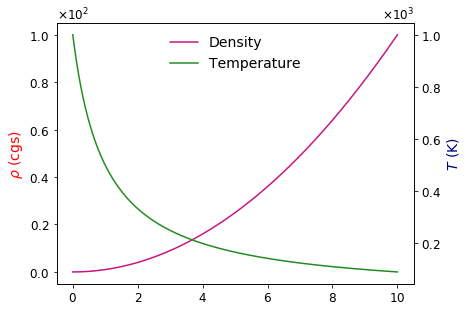

In [99]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
t = np.linspace(0, 10, 10**3)
line1 = ax1.plot(t, t**2, '-', color='mediumvioletred', label='Density')
line2 = ax2.plot(t, 1000/(t+1), color='forestgreen', label='Temperature')
ax1.set_ylabel(r"$\rho$ (cgs)", color='red')
ax2.set_ylabel("$T$ (K)", color='navy')

lines = line1+line2
legends = [line.get_label() for line in lines]
ax1.legend(lines, legends, loc='upper center', frameon=False)

# for tick in ax1.xaxis.get_ticklabels():
#     tick.set_fontsize(12)
#     tick.set_fontname('Arial')
#     tick.set_color('blue')
#     tick.set_weight('bold')
plt.show()

#### Colorbars

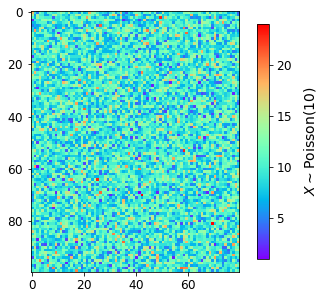

In [100]:
fig, ax = plt.subplots()
image = np.random.poisson(10., (100, 80))
img = ax.imshow(image, interpolation='nearest', cmap=plt.cm.rainbow)
cb = fig.colorbar(img, shrink=0.9, pad=0.05)
cb.set_label(r'$X \sim \mathrm{Poisson(10)}$', labelpad=10)
plt.show()

## Reading and Writing files

[**&uarr; Return to Contents**](#Practical-Python-for-Astronomers)

In [101]:
from six.moves.urllib import request
url = 'http://python4astronomers.github.com/_downloads/data.txt'
with open('data.txt', 'wb') as file:
    file.write(request.urlopen(url).read())

In [102]:
with open('data.txt', 'r') as file:
    content = file.read()
    print(content)

RAJ        DEJ                          Jmag   e_Jmag
2000 (deg) 2000 (deg) 2MASS             (mag)  (mag) 
---------- ---------- ----------------- ------ ------
010.684737 +41.269035 00424433+4116085   9.453  0.052
010.683469 +41.268585 00424403+4116069   9.321  0.022
010.685657 +41.269550 00424455+4116103  10.773  0.069
010.686026 +41.269226 00424464+4116092   9.299  0.063
010.683465 +41.269676 00424403+4116108  11.507  0.056
010.686015 +41.269630 00424464+4116106   9.399  0.045
010.685270 +41.267124 00424446+4116016  12.070  0.035



### ```astropy.io.ascii```

In [103]:
from astropy.io import ascii

In [104]:
dummy_table = """
col1 col2 col3
1    2    "hi there"
3    4.2  world
"""

In [105]:
ascii.read(dummy_table).to_pandas()

,col1,col2,col3
0,1,2.0,hi there
1,3,4.2,world


**Guessing**

Parsing every ascii table is a non trivial task, so the parser guesses the format until it gets a "reasonable" answer.

In [106]:
custom_del_table = """col1 & col2
  1  & hi there
  3  & world
"""

In [107]:
ascii.read(custom_del_table, delimiter="&").to_pandas()

,col1,col2
0,1,hi there
1,3,world


**No guessing**

It may be useful to disble guessing if you wanna know what's wrong with the table.

### Writing

In [108]:
table  = """
col1,col2,col3
1,hello world,2.5
3,again,5.0"""

In [109]:
dat = ascii.read(table)

In [110]:
import sys

In [111]:
sys.stdout

In [112]:
ascii.write(dat, output=sys.stdout)

col1 col2 col3
1 "hello world" 2.5
3 again 5.0


In [113]:
ascii.write(dat, output=sys.stdout, format='latex')

\begin{table}
\begin{tabular}{ccc}
col1 & col2 & col3 \\
1 & hello world & 2.5 \\
3 & again & 5.0 \\
\end{tabular}
\end{table}


**Final example**

In [114]:
types = ['barred spiral', 'spiral', 'peculiar (ring)', 'elliptical', 'elliptical']
redshifts = np.array([0.024221, 0.132, 0.22, 0.34, 0.45])
lums = np.array([1e40, 1.2e40, 2e40, 3e40, 4e40])
table = {'type': types, 'redshift': redshifts, 'lum': lums}

In [115]:
ascii.write(table, 'galaxies.dat', formats={'redshift': '%.5f', 'lum': '%.2e'}, overwrite=True)

In [116]:
ascii.read('galaxies.dat').to_pandas()

,type,redshift,lum
0,barred spiral,0.02422,1.000000e+40
1,spiral,0.13200,1.200000e+40
2,peculiar (ring),0.22000,2.000000e+40
3,elliptical,0.34000,3.000000e+40
4,elliptical,0.45000,4.000000e+40


### Numpy ASCII capabilities

In [117]:
from six.moves import cStringIO as StringIO

In [118]:
c = StringIO('0 1\n2 3')

In [119]:
np.loadtxt(c)

array([[0., 1.],
       [2., 3.]])

In [120]:
d = StringIO('''
# Abundances of different elements
# for TW Hya
# taken from Guenther et al. (2007)
# element, abund, error, first-ionisation-potential [eV]
C  0.2  0.03 11.3
N  0.51 0.05 14.6
O  0.25 0.01 13.6
Ne 2.46 0.08 21.6
Fe 0.19 0.01  7.9
''')

In [121]:
data = np.loadtxt(d, dtype={'names': ('element', 'abund', 'error', 'FIP'), 
                             'formats': ('S2', 'f4', 'f4', 'f4')}, comments='#')

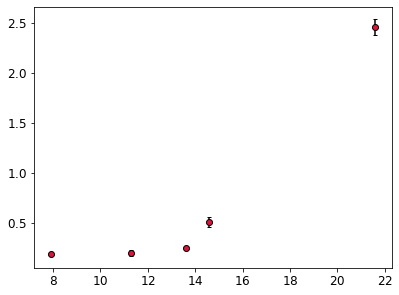

In [122]:
plt.errorbar(data['FIP'], data['abund'], yerr=data['error'], fmt='o', color='k', mfc='crimson', capsize=2)
plt.show()

In [123]:
d = StringIO('''
#element abund error FIP
C  0.2  0.03 11.3
N  0.51 0.05 14.6
O  0.25 0.01 13.6
Ne 2.46 0.08 21.6
S  nn   nn   aa
Fe 0.19 0.01  7.9
other elements were not meesured
''')

In [124]:
data = np.genfromtxt(d, dtype=('S2', 'f4', 'f4', 'f4'), names = True,
     skip_footer = 1, missing_values = ('nn', 'aa'), filling_values=(np.nan))

In [125]:
data

array([(b'C', 0.2 , 0.03, 11.3), (b'N', 0.51, 0.05, 14.6),
       (b'O', 0.25, 0.01, 13.6), (b'Ne', 2.46, 0.08, 21.6),
       (b'S',  nan,  nan,  nan), (b'Fe', 0.19, 0.01,  7.9)],
      dtype=[('element', 'S2'), ('abund', '<f4'), ('error', '<f4'), ('FIP', '<f4')])

### ```astropy.io.fits```

In [126]:
from astropy.io import fits

In [127]:
fits_image_filename = fits.util.get_testdata_filepath('test0.fits')

In [266]:
with fits.open(fits_image_filename) as hdul:
    header = hdul[0].header

**Headers**

In [128]:
hdul = fits.open(fits_image_filename)

In [129]:
hdul.info()

Filename: /home/mpotto/anaconda3/envs/astroph/lib/python3.7/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


Works with compressed files, but is not recommended if multiple .fits are compressed in a single file. In this case, only the first .fits will be displayed.

In [130]:
with fits.open('./py4ast/core/3c120_stis.fits.gz') as hdu1:
    hdu1.info()

Filename: ./py4ast/core/3c120_stis.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     251   ()      
  1  SCI           1 ImageHDU       143   (511, 512)   float32   
  2  ERR           1 ImageHDU        71   (511, 512)   float32   
  3  DQ            1 ImageHDU        71   (511, 512)   int16   


Case insensitive

In [131]:
hdul[0].header['date']

'01/04/99'

In [132]:
hdr = hdul[0].header

In [133]:
hdr['targname'] = 'NGC121-a'

In [134]:
hdr['targname'] = ('NGC121-a', 'The observation target')

In [135]:
hdr.comments['targname']

'The observation target'

In [136]:
hdr.set('obsever', 'Edwin Hubble', 'Astronomer in charge')

Adding history and comments to the file

In [137]:
hdr['history'] = 'File updated in 2/26/09'

In [138]:
hdr['comment'] = 'Hubble knew his stuff'

In [139]:
hdr['comment'] = 'I will be using Fermi data'

In [140]:
hdr['comment']

Hubble knew his stuff
I will be using Fermi data

In [141]:
hdr['comment'][0] = 'Edwin Hubble knew his stuff'

In [142]:
hdr['comment']

Edwin Hubble knew his stuff
I will be using Fermi data

**Data**

In [143]:
data = hdul[1].data

In [144]:
data = hdul['sci'].data

In [145]:
data.shape

(40, 40)

In [146]:
data.dtype.name

'int16'

In [147]:
hdul.close()

**Table Data**

In [148]:
fits_table_filename = fits.util.get_testdata_filepath('tb.fits')

In [149]:
hdul = fits.open(fits_table_filename)

In [150]:
hdul.info()

Filename: /home/mpotto/anaconda3/envs/astroph/lib/python3.7/site-packages/astropy/io/fits/tests/data/tb.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1                1 BinTableHDU     24   2R x 4C   [1J, 3A, 1E, 1L]   


In [151]:
data = hdul[1].data

In [152]:
data

FITS_rec([(1, 'abc', 3.70000007,  0), (2, 'xy', 6.69999971,  1)],
         dtype=(numpy.record, [('c1', '>i4'), ('c2', 'S3'), ('c3', '>f4'), ('c4', 'i1')]))

In [153]:
data[0]

(1, 'abc', 3.7000000715255736, False)

In [154]:
data.field(0)

array([1, 2], dtype=int32)

In [155]:
data.field('c1')

array([1, 2], dtype=int32)

In [156]:
cols = hdul[1].columns

In [157]:
cols

ColDefs(
    name = 'c1'; format = '1J'; null = -2147483647; disp = 'I11'
    name = 'c2'; format = '3A'; disp = 'A3'
    name = 'c3'; format = '1E'; bscale = 3; bzero = 0.4; disp = 'G15.7'
    name = 'c4'; format = '1L'; disp = 'L6'
)

In [158]:
cols.info()

name:
    ['c1', 'c2', 'c3', 'c4']
format:
    ['1J', '3A', '1E', '1L']
unit:
    ['', '', '', '']
null:
    [-2147483647, '', '', '']
bscale:
    ['', '', 3, '']
bzero:
    ['', '', 0.4, '']
disp:
    ['I11', 'A3', 'G15.7', 'L6']
start:
    ['', '', '', '']
dim:
    ['', '', '', '']
coord_type:
    ['', '', '', '']
coord_unit:
    ['', '', '', '']
coord_ref_point:
    ['', '', '', '']
coord_ref_value:
    ['', '', '', '']
coord_inc:
    ['', '', '', '']
time_ref_pos:
    ['', '', '', '']


Notice the final *s* for accessing ColDefs

In [159]:
cols.names, cols.disps, cols.bzeros

(['c1', 'c2', 'c3', 'c4'], ['I11', 'A3', 'G15.7', 'L6'], ['', '', 0.4, ''])

In [160]:
data['c4'][:] = 0

In [161]:
hdul.writeto('newtable.fits', overwrite=True)

In [162]:
hdul.close()

**Creating Images**

In [163]:
n = np.arange(100.0)

In [164]:
hdu = fits.PrimaryHDU(n)

In [165]:
hdul = fits.HDUList([hdu])

In [166]:
hdul.writeto('new1.fits', overwrite=True)

I could even avoid the HDUList definition

In [167]:
hdu.writeto('new2.fits', overwrite=True)

In [168]:
with fits.open('new1.fits') as hdul:
    hdu = hdul[0]
    print(hdu.data)
    print(repr(hdu.header))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                  100                                                  
EXTEND  =                    T                                                  


**Creating tabular data**

In [169]:
from astropy.table import Table

In [170]:
t = Table([[1,2], [4, 5], ['s', 'd']], names=('c1', 'c2', 'c3'))

In [171]:
t.write('table1.fits', format='fits', overwrite=True)

In [172]:
with fits.open('table1.fits') as hdul:
    hdu = hdul[1].data
    cols = hdu.columns
    print(hdu)
    print(cols.info())

[(1, 4, 's') (2, 5, 'd')]
name:
    ['c1', 'c2', 'c3']
format:
    ['K', 'K', '1A']
unit:
    ['', '', '']
null:
    ['', '', '']
bscale:
    ['', '', '']
bzero:
    ['', '', '']
disp:
    ['', '', '']
start:
    ['', '', '']
dim:
    ['', '', '']
coord_type:
    ['', '', '']
coord_unit:
    ['', '', '']
coord_ref_point:
    ['', '', '']
coord_ref_value:
    ['', '', '']
coord_inc:
    ['', '', '']
time_ref_pos:
    ['', '', '']
None


**Files with multiple extensions**

In [173]:
n1 = np.ones((3,3))
n2 = np.ones((100, 100))
n3 = np.ones((10, 10, 10))

In [174]:
primary_hdu = fits.PrimaryHDU(n1)
image_hdu = fits.ImageHDU(n2)
image_hdu2 = fits.ImageHDU(n3)

In [175]:
c1 = fits.Column(name='a', array=np.array([1, 2]), format='K')
c2 = fits.Column(name='b', array=np.array([4, 5]), format='K')
c3 = fits.Column(name='c', array=np.array([7, 8]), format='K')

In [176]:
table_hdu = fits.BinTableHDU.from_columns([c1, c2, c3])

In [177]:
table_hdu.data.field('a')

array([1, 2])

In [178]:
hdul = fits.HDUList([primary_hdu, image_hdu, table_hdu])

In [179]:
hdul.append(image_hdu2)

In [180]:
hdr = fits.Header()

In [181]:
hdr['observer'] = 'Edwin Hubble'

In [182]:
hdr['comment'] = 'Some commentary about this FITS file'

In [183]:
hdr.set('date', '10/03/2020', 'Date of file creation')

In [184]:
empty_primary = fits.PrimaryHDU(header=hdr)

In [185]:
hdul = fits.HDUList([empty_primary, image_hdu2, table_hdu])

In [186]:
hdul.writeto('multiple_ext.fits', overwrite=True)

In [187]:
with fits.open('multiple_ext.fits') as hdul:
    hdul.info()

Filename: multiple_ext.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1                1 ImageHDU         8   (10, 10, 10)   float64   
  2                1 BinTableHDU     14   2R x 3C   [K, K, K]   


**Convenience functions**

Avoid them during scripting. They are highly inneficient when used improperly.

In [188]:
hdr = fits.getheader('multiple_ext.fits')

In [189]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
OBSERVER= 'Edwin Hubble'                                                        
DATE    = '10/03/2020'         / Date of file creation                          
COMMENT Some commentary about this FITS file                                    

In [190]:
hdr['comment'] = 'I updated this header on 10/03/2020'

In [191]:
data = fits.getdata('multiple_ext.fits')

In [192]:
with fits.open('multiple_ext.fits', 'update') as hdul:
    hdr = hdul[0].header
    hdr['comment'] = 'I updated this header on 10/03/2020'
    hdul.flush()

In [193]:
with fits.open('multiple_ext.fits') as hdul:
    hdr = hdul[0].header
    print(repr(hdr))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
OBSERVER= 'Edwin Hubble'                                                        
DATE    = '10/03/2020'         / Date of file creation                          
COMMENT Some commentary about this FITS file                                    
COMMENT I updated this header on 10/03/2020                                     


## Astropy Core Functions

[**&uarr; Return to Contents**](#Practical-Python-for-Astronomers)

In [194]:
t = Table.read('data/rosat.vot', format='votable')

In [195]:
t.to_pandas()

/home/mpotto/anaconda3/envs/astroph/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column 'PosErr' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,_1RXS,RAJ2000,DEJ2000,PosErr,NewFlag,Count,e_Count,HR1,e_HR1,HR2,e_HR2,Extent
0,b'J000000.0-392902',0.00000,-39.48403,19.0,b'__..',0.1310,0.0350,0.69,0.25,0.28,0.24,0
1,b'J000007.0+081653',0.02917,8.28153,10.0,b'TT..',0.1870,0.0205,0.89,0.10,0.24,0.13,0
2,b'J000010.0-633543',0.04167,-63.59528,11.0,b'__..',0.1900,0.0312,-0.36,0.13,-0.35,0.23,13
3,b'J000011.9+052318',0.04958,5.38833,7.0,b'__..',0.2640,0.0259,0.24,0.10,0.00,0.13,0
4,b'J000012.6+014621',0.05250,1.77250,11.0,b'__..',0.0811,0.0161,0.05,0.20,0.00,0.26,14
...,...,...,...,...,...,...,...,...,...,...,...,...
18801,b'J235930.9-401541',359.87875,-40.26139,18.0,b'__..',0.1280,0.0367,-0.73,0.18,0.02,0.82,0
18802,b'J235940.9-314342',359.92041,-31.72847,19.0,b'__..',0.0584,0.0169,0.17,0.30,0.33,0.34,0
18803,b'J235941.2+830719',359.92166,83.12195,10.0,b'__..',0.0664,0.0111,0.72,0.14,0.19,0.17,0
18804,b'J235944.7+220014',359.93625,22.00389,17.0,b'__..',0.0525,0.0148,-0.01,0.27,0.37,0.35,0


/home/mpotto/anaconda3/envs/astroph/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mpotto/anaconda3/envs/astroph/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


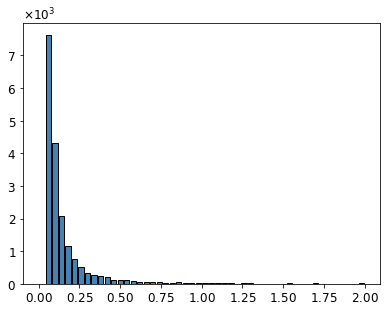

In [196]:
plt.hist(t['Count'], bins=50, range=[0., 2], rwidth=0.8, color='steelblue', edgecolor='k')
plt.show()

### WCS Transformations

[**&uarr; Return to Contents**](#Practical-Python-for-Astronomers)

We'll be using the following image of the soft X-ray background in Aitoff projection.

In [197]:
with fits.open('data/ROSAT.fits') as hdul:
    data = hdul[0].data
    header = hdul[0].header

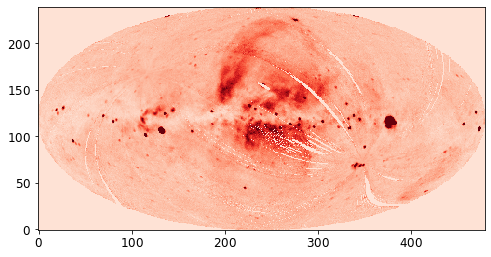

In [198]:
plt.figure(figsize=(8,6))
plt.imshow(data, cmap=plt.cm.Reds, vmin=-100, vmax=800, origin='lower')
plt.ticklabel_format(style='plain', axis='both')
plt.show()

In [199]:
from astropy.wcs import WCS

In [200]:
w = WCS('data/ROSAT.fits')

In [201]:
w

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-AIT'  'GLAT-AIT'  
CRVAL : 0.0  0.0  
CRPIX : 240.5  120.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.675  0.675  
NAXIS : 480  240

In [202]:
WCS(header)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-AIT'  'GLAT-AIT'  
CRVAL : 0.0  0.0  
CRPIX : 240.5  120.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.675  0.675  
NAXIS : 480  240

In [203]:
wx, wy = w.wcs_pix2world(250., 100., 1)

In [204]:
wx, wy

(array(353.44239047), array(-13.86573043))

In [205]:
px, py = w.wcs_world2pix(0, 0, 1)

In [206]:
px, py

(array(240.5), array(120.5))

**Exercício 3**

In [207]:
parallel_range = np.linspace(-180, 180, 10**3)
meridian_range = np.linspace(-90, 90, 10**3)

In [208]:
parallels = [w.wcs_world2pix(parallel_range, y, 1) for y in np.arange(-90, 90, 30)]

In [209]:
meridians = [w.wcs_world2pix(x, meridian_range, 1) for x in np.arange(-180, 181, 30)]

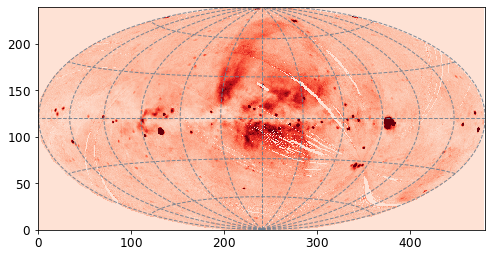

In [210]:
plt.figure(figsize=(8,6))
plt.imshow(data, cmap=plt.cm.Reds, vmin=-100, vmax=800, origin='lower')
plt.ticklabel_format(style='plain', axis='both')
for par in parallels:
    plt.plot(par[0], par[1], '--', color='slategray', alpha=0.9, linewidth=1)
for mer in meridians:
    plt.plot(mer[0], mer[1],'--', color='slategray', alpha=0.9, linewidth=1)
ax = plt.gca()
ax.set_xlim(0, data.shape[1])
ax.set_ylim(0, data.shape[0])
plt.show()

### Celestial coordinates

In [211]:
from astropy.coordinates import SkyCoord

In [212]:
from astropy import units as u

In [213]:
c = SkyCoord(ra=10.68458, dec=41.26917, unit=(u.deg, u.deg))

In [214]:
c.ra.to('hourangle')

<Longitude 0.71230533 hourangle>

In [215]:
c.ra.hms

hms_tuple(h=0.0, m=42.0, s=44.299200000000525)

In [216]:
c.dec.to('radian')

<Latitude 0.7202829 rad>

In [217]:
c.galactic

<SkyCoord (Galactic): (l, b) in deg
    (121.17424181, -21.57288557)>

In [218]:
c_eq = SkyCoord.from_name('M110')

In [219]:
c_eq

<SkyCoord (ICRS): (ra, dec) in deg
    (10.09189356, 41.68541564)>

**Exercício 1**

In [220]:
c_crab = SkyCoord.from_name('M1')

In [221]:
c_crab

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63308333, 22.0145)>

In [222]:
c_crab.galactic

<SkyCoord (Galactic): (l, b) in deg
    (184.55745788, -5.78435671)>

### Astropy II: Analyzing UVES Spectroscopy

## Fitting and Modelling 1D and 2D data

[**&uarr; Return to Contents**](#Practical-Python-for-Astronomers)

#### Brute-force grids

Testing all parameters choice in a grid and use the one that minimized chi-squared.

In [223]:
def generate_param(step, min_value, max_value, n_tries):
    delta = (max_value-min_value)/n_tries
    return min_value + step*delta

In [224]:
def generate_data(n_samples, mean=0, variance=1,random_state=42):
    np.random.seed(random_state)
    return np.random.normal(mean, variance, n_samples)

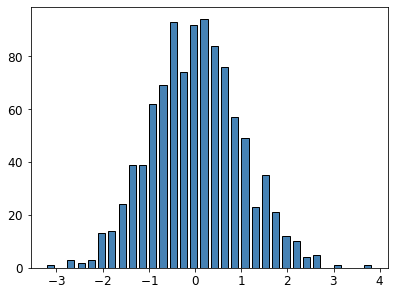

In [225]:
plt.hist(generate_data(10**3), bins='sqrt', align='mid', rwidth=0.7, color='steelblue', edgecolor='k')
plt.show()

In [226]:
a_min, a_max = -2.5, 2.5
b_min, b_max = -1.0, 1.0
steps = 500

In [227]:
grid = np.zeros((steps, steps))

In [228]:
data = generate_data(10)

This step can be vectorized, don't fall in their trap by thinking it will be necessarily unneficient. 

In [229]:
for s1 in range(steps):
    for s2 in range(steps):
        a = generate_param(s1, a_min, a_max, steps-1)
        b = generate_param(s2, b_min, b_max, steps-1)
        chi2 = 0.0
        for i in range(len(data)):
            res = (data[i] - a - b*i)
            chi2 += res*res
        grid[steps-1-s2, s1] = chi2        

In [230]:
grid.min()

4.700813310182993

In [231]:
grid.max()

640.8022513602841

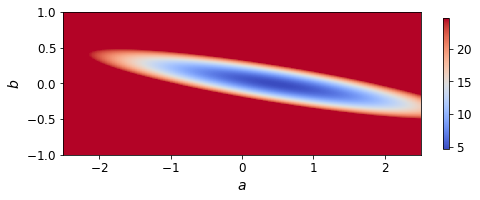

In [232]:
fig, ax = plt.subplots(figsize=(8,6))
grid_image = ax.imshow(grid, extent=[a_min, a_max, b_min, b_max], vmin=grid.min(), cmap=plt.cm.coolwarm, vmax=grid.min()+20)
fig.colorbar(grid_image, shrink=0.4)
ax.set_xlabel("$a$")
ax.set_ylabel("$b$")
plt.show()

**A simple benchmark**

In [233]:
res = 1

In [234]:
%timeit -n10 -r10 res*res

43.2 ns ± 11 ns per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [235]:
%timeit -n10 -r10 res**2

160 ns ± 16 ns per loop (mean ± std. dev. of 10 runs, 10 loops each)


#### Least-squares fitting in Python

**Important**: if and only if data's noise is gaussian, minimizing %\chi^2$ is identical to maximizing the likelihood. For non-Gaussian data noise, least squares is just a recipe without any probabilistic interpretation (that is, no uncertainty estimates can be extracted from it).

In [236]:
data_gen = np.poly1d([1, 0]) 

In [237]:
x = np.linspace(0, 5, 10)

In [238]:
y = data_gen(x) + np.random.normal(0, 0.5, x.shape)

In [239]:
sigma = np.ones(y.shape)*0.5

In [240]:
model = lambda x, a, b, c: a + b*x + c*x**2

In [241]:
from scipy.optimize import curve_fit

In [242]:
pfit, pcov = curve_fit(model, x, y, sigma=sigma, p0=[0.0, 0.0, 0.0])

Straightforward $1\sigma$ error calculation!

In [243]:
np.sqrt(np.diag(pcov))

array([0.32831315, 0.30580278, 0.0588787 ])

In [244]:
xrange = np.linspace(x.min(), x.max(), 10**3)

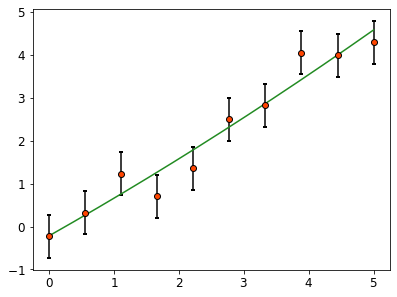

In [245]:
plt.errorbar(x, y, yerr=sigma, fmt='o', color='k', mfc='orangered', capsize=2, capthick=2)
plt.plot(xrange, model(xrange, *pfit), color='forestgreen')
plt.show()

Least-squares, such as Levenberg-Marquadt bases ```curve_fit``` are greedy methods and doomed to run into the nearest local minimum

#### Simplex Algorithm

In [246]:
from scipy.optimize import fmin as simplex

In [247]:
def objective_function(params, xdata, ydata, sigma):
    a, b, c = params
    chi2 = np.sum([(a+b*xdata[i]+c*xdata[i]**2-ydata[i])**2/sigma[i]**2 for i in range(len(xdata))])
    return chi2

In [248]:
simplex_coef = simplex(objective_function, args=(x, y, sigma), x0=[0.0, 0.0, 0.0], full_output=False)

Optimization terminated successfully.
         Current function value: 4.882231
         Iterations: 162
         Function evaluations: 301


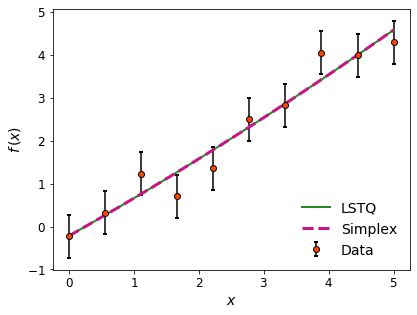

In [249]:
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=sigma, fmt='o', color='k', mfc='orangered', capsize=2, capthick=2, label='Data')
ax.plot(xrange, model(xrange, *pfit), color='forestgreen', linewidth=2, label='LSTQ')
ax.plot(xrange, model(xrange, *simplex_coef), color='mediumvioletred', linestyle='dashed', linewidth=3, label='Simplex')
plt.legend(loc='lower right', frameon=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f\,(x)$')
plt.show()

In [250]:
import astropy.units as u

#### Example: Salpeter stellar mass function

Salpeter (1955) found that for stars of masses $M \ge M_{\odot}$ the mass distribution is given py a power law:

$$\frac{dN}{dM} \propto \left ( \frac{M}{M_{\odot}}\right)^{-\alpha} $$

He found $\alpha \approx 2.35$.

**Outline**
* Draw samples from Salpter SMF to simulate data for testing purposes. This will lead us to MC sampling.
* Parameters optimisation: how to fit $\alpha$ for given data. This will lead us to Metropolis-Hastings algorithm.
* Improving parameter optimisation. This will lead us to Hamiltonian Monte-Carlo.

#### Monte-Carlo sampling from Salpter SMF

**Notes about the method**

Formally, we can interpret this step as having a probability density parametrized by $\alpha$:

$$ f(M | \alpha) = A \left( \frac{M}{M_{\odot}} \right)^{-\alpha}$$

where $A$ is a normalization constant. Evaluating $A$ we get:

$$ f(M | \alpha) =  \frac{\alpha-1}{M_{\odot}} \left( \frac{M}{M_{\odot}} \right)^{-\alpha} =  \frac{\alpha-1}{M_{\odot}^{1-\alpha}} M^{-\alpha}$$

The log-likelihood of the random variable $M$ is, then:

$$ \log{\mathcal{L}(\alpha)} = \log{(\alpha-1)} - (1- \alpha) \log{M_{\odot}} - \alpha \log{M}   $$

Now, the score function:

$$ \frac{\partial\log{\mathcal{L}(\alpha)}}{\partial \alpha} = \frac{1}{\alpha-1} + \log{M_{\odot}} - \log{M}$$

The MLE is then:

$$ M = M_{\odot} e^{\frac{1}{\alpha-1}}$$

This is not what they did in the example! But they argument is fallacious: they did a random variable transformation behind the scenes so that sampling a log-uniform distribution on masses will give the right distribution on a non-log mass scale.

In [251]:
np.random.seed(42)

**Using a uniform distribution**

In [252]:
def sample_from_smf_uniform(n, alpha, m_min, m_max):
    mle = m_min*np.exp(1/(alpha-1))
    sampled_masses = []
    while len(sampled_masses) < n:
        m = np.random.uniform(m_min, m_max)
        likelihood = (alpha-1)/(m_min)**(1-alpha) * m**(-alpha)
        u = np.random.uniform(0, mle)
        if (u < likelihood):
            sampled_masses.append(m)
    return sampled_masses

In [253]:
a =  sample_from_smf_uniform(10**6, 2.35, 1.0, 10.0)

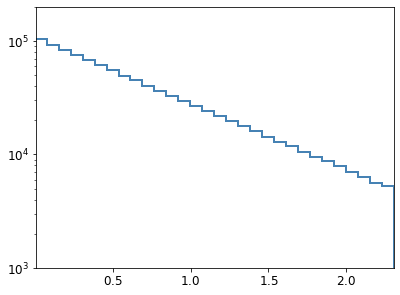

In [254]:
plt.hist(np.log(a), bins=30, histtype='step', lw=2, log=True, color='steelblue')
plt.xlim(0.01, np.log(10.0))
plt.ylim(10**3, 2*10**5)
plt.show()

**Using a log-uniform**

In [255]:
def sample_from_smf_log_uniform(n, alpha, m_min, m_max):
    log_min, log_max = np.log(m_min), np.log(m_max)
    mle = m_min**(1-alpha)
    sampled_masses = []
    while len(sampled_masses) < n:
        log_m = np.random.uniform(log_min, log_max)
        m = np.exp(log_m)
        likelihood = m**(1-alpha)
        u = np.random.uniform(0, mle)
        if (u < likelihood):
            sampled_masses.append(m)
    return sampled_masses

In [256]:
masses = sample_from_smf_log_uniform(10**6, 2.35, 1.0, 10.0)

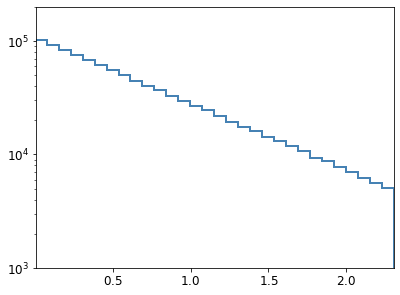

In [257]:
plt.hist(np.log(masses), bins=30, histtype='step', lw=2, log=True, color='steelblue')
plt.xlim(0.01, np.log(10.0))
plt.ylim(10**3, 2*10**5)
plt.show()

**Comparing sampling methods**

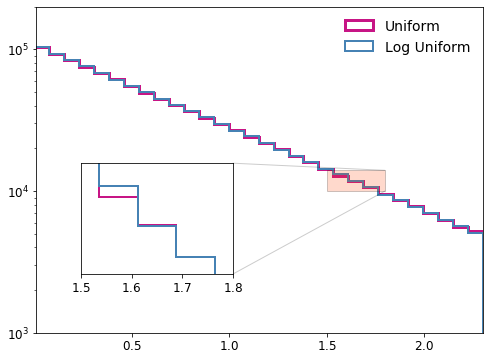

In [261]:
plt.rc('text', usetex=False)
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(np.log(a), bins=30, histtype='step', lw=3,  log=True, color='mediumvioletred', label='Uniform')
ax.hist(np.log(masses), bins=30, histtype='step', lw=2, log=True, color='steelblue', label='Log Uniform')
ax.set_xlim(0.01, np.log(10.0))
ax.set_ylim(10**3, 2*10**5)
plt.legend(loc='upper right', frameon=False)
ax2 = ax.inset_axes([0.1, 0.18, 0.34, 0.34])
ax2.hist(np.log(a), bins=30, histtype='step', lw=2,  color='mediumvioletred')
ax2.hist(np.log(masses), bins=30, histtype='step', lw=2, color='steelblue')
ax2.set_ylim(10**4, 1.4*10**4)
ax2.set_xlim(1.5, 1.8)
ax2.set_yticks([])
ax.indicate_inset_zoom(ax2, edgecolor='k',facecolor='orangered', alpha=0.2)
plt.show()

#### Metropolis-Hastings Algorithm

$$\mathcal L(\{M_1,M_2,\ldots,M_N\};\alpha) = \prod_{n=1}^N p(M_n|\alpha) = \prod_{n=1}^N c\left(\frac{M_n}{M_\odot}\right)^{-\alpha}$$

where $c$ is the normalization constant

$$ c = \frac{1-\alpha}{M_{max}^{1-\alpha}-M_{min}^{1-\alpha}} $$

Given that pdf's are always positive, we can work with the log-likelihood. Hereafter, we'll use $D$ for:

$$ D = \sum_{i=1}^{N} \log{\frac{M_i}{M_{\odot}}}$$

where we explicitly assumed $M_{min} = M_{\odot}$.

In [259]:
n = 10**6
m_min = 1.0
m_max = 100.0

In [260]:
masses_smf = sample_from_smf_log_uniform(n, 2.35, m_min, m_max)

KeyboardInterrupt: 

In [ ]:
log_masses_smf = np.log(np.array(masses_smf))
d = log_masses_smf.sum()
stepsize = 5e-3

In [ ]:
def smf_log_likelihood(alpha, d, n, m_min, m_max):
    normalization_factor = (1.0 - alpha)/(m_max**(1.0-alpha)-m_min**(1.0-alpha))
    return n*np.log(normalization_factor) - alpha*d

In [ ]:
guesses_chain = [3.0]
for i in range(10**6):
    old_alpha = guesses_chain[-1]
    old_loglik = smf_log_likelihood(old_alpha, d, n, m_min, m_max)
    new_alpha = np.random.normal(old_alpha, stepsize)
    new_loglik = smf_log_likelihood(new_alpha, d, n, m_min, m_max)
    
    if (new_loglik > old_loglik).all():
        guesses_chain.append(new_alpha)
    else:
        u = np.random.uniform(0.0, 1.0)
        if (u < np.exp(new_loglik-old_loglik)).all():
            guesses_chain.append(new_alpha)
        else:
            guesses_chain.append(old_alpha)
    

In [ ]:
guesses_chain = np.array(guesses_chain)

In [ ]:
cleaned_chain = guesses_chain[guesses_chain.size//2::10]

In [ ]:
cleaned_chain.mean()

In [ ]:
cleaned_chain.std()

In [ ]:
plt.hist(cleaned_chain, bins=20, align='mid', histtype='step', lw=2.5, color='k')
plt.axvline(x=2.35, color='crimson', linewidth=3, linestyle='dashed')
plt.text(x=2.3497, y=9.3e3, s=r'$\alpha$', fontsize=20, color='crimson')
plt.axvline(x=cleaned_chain.mean(), linestyle='dashed', color='k', lw=2)
plt.xlabel(r"$\alpha$")
plt.xlim(2.345, 2.36)
plt.show()

#### Hamiltonian Monte Carlo

Uses a single stepsize but improves efficiency by making use of gradients of the objective function and Hamiltonian dynamics. It is like the log-likelihood we want to maximize is minus the energy and we are looking for minimima of the energy, maximizing, then, the likelihood.


In [ ]:
def evaluate_gradient(alpha, d, n, m_min, m_max):
    log_m_min, log_m_max = np.log(m_min), np.log(m_max)
    grad = -d - n/(1-alpha) * (1 + (1-alpha)/(m_max**(1-alpha)-m_min**(1-alpha)) * (log_m_min*m_min**(1-alpha)-log_m_max*m_max**(1-alpha)))
    return grad

In [ ]:
step_hmc = 4.7e-5

In [ ]:
n = 10**6

In [ ]:
guesses_chain_hmc = [3.0]
for i in range(10**6):
    old_alpha = guesses_chain_hmc[-1]
    old_energy = -smf_log_likelihood(old_alpha, d, n, m_min, m_max)
    old_grad = -evaluate_gradient(old_alpha, d, n, m_min, m_max)
    
    new_alpha = old_alpha
    new_grad = old_grad
    
    p = np.random.normal(0.0, 1.0)
    H = np.dot(p, p)/2.0 + old_energy
    
    for tau in range(5):    
        p = p - step_hmc*new_grad/2.0
        new_alpha = new_alpha + step_hmc*p
        new_grad = -evaluate_gradient(old_alpha, d, n, m_min, m_max)
        p = p - step_hmc*new_grad/2.0
        
    new_energy = -smf_log_likelihood(new_alpha, d, n, m_min, m_max)
    newH = np.dot(p, p)/2.0 + new_energy
    dH = newH - H
    
    if (dH < 0.0):
        guesses_chain_hmc.append(new_alpha)
    else:
        u = np.random.uniform(0.0, 1.0)
        if (u < np.exp(-dH)):
            guesses_chain_hmc.append(new_alpha)
        else:
            guesses_chain_hmc.append(old_alpha)

In [ ]:
guesses_chain_hmc = np.array(guesses_chain_hmc)

In [ ]:
cleaned_hmc = guesses_chain_hmc[guesses_chain_hmc.size//2:-1:10]

In [ ]:
guesses_chain_hmc.mean(), guesses_chain_hmc.std()

In [ ]:
guesses_chain.mean(), guesses_chain.std()

In [ ]:
cleaned_hmc

In [ ]:
plt.hist(cleaned_hmc, bins=20, histtype='step', lw=2.5, color='k')
plt.axvline(x=2.35, color='crimson', linewidth=3, linestyle='dashed')
plt.text(x=2.3498, y=8.8e3, s=r'$\alpha$', fontsize=20, color='crimson')
plt.axvline(x=cleaned_chain.mean(), linestyle='dashed', color='k', lw=2)
plt.xlabel(r"$\alpha$")
plt.show()